In [36]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [37]:
building_id = 32
subset_df = pd.read_csv('/Users/veronica/Library/CloudStorage/GoogleDrive-veronicahangsan@gmail.com/.shortcut-targets-by-id/1FsOPywSgK_wZmrVrSTBVi4q8G3Mg_yMJ/Team-Fermata-Energy/processed_data/subset20.csv')
processed_df = pd.read_csv(f'/Users/veronica/Library/CloudStorage/GoogleDrive-veronicahangsan@gmail.com/.shortcut-targets-by-id/1FsOPywSgK_wZmrVrSTBVi4q8G3Mg_yMJ/Team-Fermata-Energy/processed_data/processed_weather_load_w_timestamp/{building_id}.csv')

In [38]:
processed_df.rename(columns={'timestamp': 'ds', 'out.electricity.total.energy_consumption': 'y'}, inplace=True)

In [39]:
processed_df['ds'] = pd.to_datetime(processed_df['ds'])

In [40]:
start_date = processed_df['ds'].min()
print(f"Data starts at: {start_date}")


Data starts at: 2018-01-01 01:00:00


In [41]:
model = Prophet()
model.fit(processed_df)

02:13:04 - cmdstanpy - INFO - Chain [1] start processing
02:13:07 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future = model.make_future_dataframe(periods=24, freq='H')

/Users/veronica/Library/Python/3.11/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


(<Figure size 1000x600 with 1 Axes>, <Figure size 900x900 with 3 Axes>)

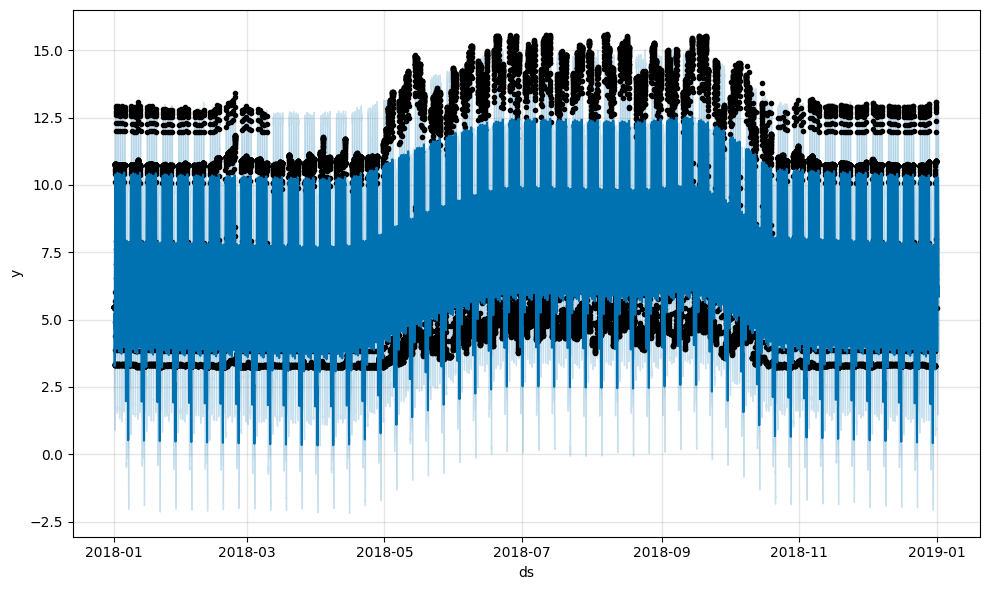

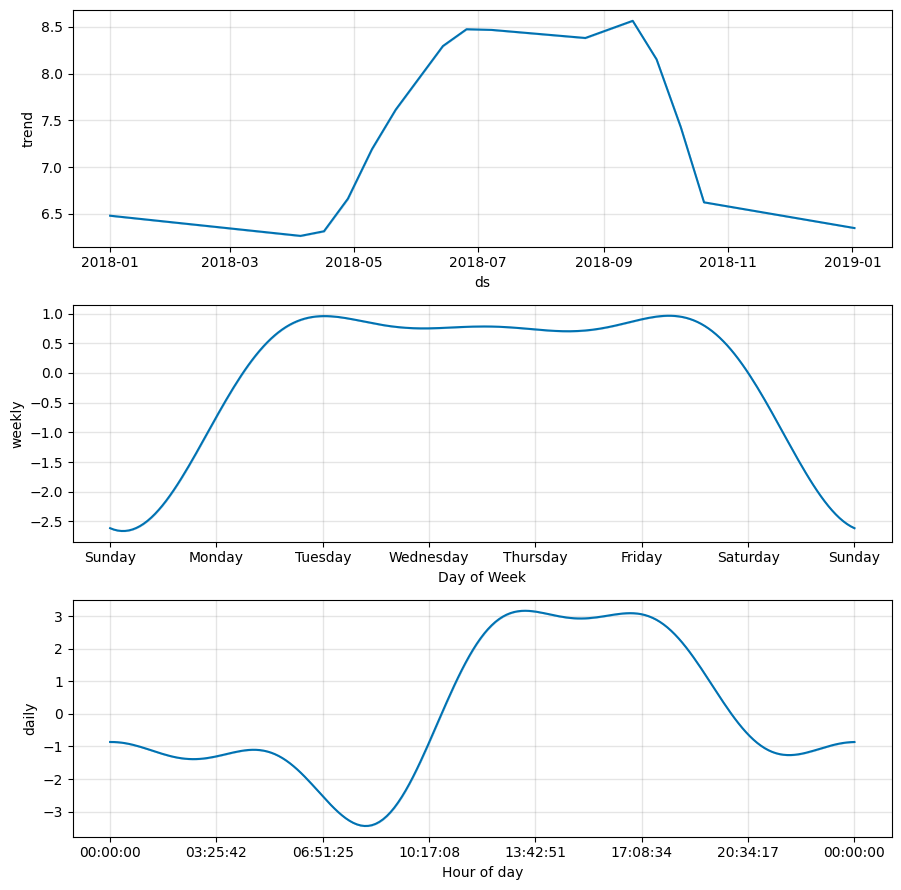

In [45]:
forecast = model.predict(future)

forecast_plot = model.plot(forecast)

trend_plot = model.plot_components(forecast)

forecast_plot, trend_plot